In [10]:
import numpy as np
import matplotlib.pyplot as plt


In [13]:
class PIController:
    def __init__(self, kp, ki, dt):
        self.kp = kp
        self.ki = ki
        self.dt = dt
        self.integral = 0

    def control(self, error):
        self.integral += error * self.dt
        output = self.kp * error + self.ki * self.integral
        return output
    
# class InductionMotor:
#     def __init__(self, r_s, l_s, t_r, dt):
#         self.r_s = r_s  # Stator resistance
#         self.l_s = l_s  # Stator inductance
#         self.t_r = t_r  # Rotor time constant
#         self.dt = dt
#         self.i_s_d = 0  # d-axis stator current
#         self.i_s_q = 0  # q-axis stator current
#         self.psi_r_d = 0  # d-axis rotor flux
#         self.psi_r_q = 0  # q-axis rotor flux

#     def update_currents(self, v_d, v_q):
#         # # Update rotor fluxes
#         # d_psi_r_d = v_d - self.r_s * self.i_s_d
#         # d_psi_r_q = v_q - self.r_s * self.i_s_q
#         # self.psi_r_d += d_psi_r_d * self.dt
#         # self.psi_r_q += d_psi_r_q * self.dt
        
#         # Update stator currents
#         di_s_d = (v_d - self.r_s * self.i_s_d - self.psi_r_d / self.t_r) / self.l_s
#         di_s_q = (v_q - self.r_s * self.i_s_q - self.psi_r_q / self.t_r) / self.l_s
#         self.i_s_d += di_s_d * self.dt
#         self.i_s_q += di_s_q * self.dt
        
#         return self.i_s_d, self.i_s_q
    
class InductionMotor:
    def __init__(self, r_s, l_s, t_r, dt):
        self.r_s = r_s  # Stator resistance
        self.l_s = l_s  # Stator inductance
        self.t_r = t_r  # Rotor time constant
        self.dt = dt
        self.i_s = 0  # Stator current

    def update_current(self, voltage):
        di = (voltage - self.r_s * self.i_s) / self.l_s
        self.i_s += di * self.dt
        return self.i_s

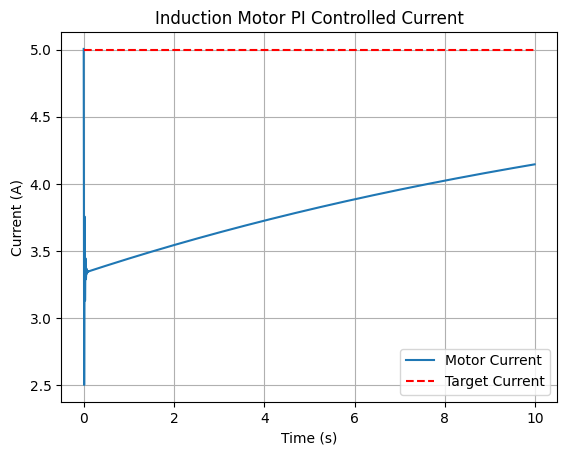

In [14]:
# Define motor parameters
r_s = 0.5  # Stator resistance (Ohm)
l_s = 0.01 # Stator inductance (H)
t_r = 0.1  # Rotor time constant (s)
dt = 0.01  # Time step (s)

# Create motor and PI controller instances
motor = InductionMotor(r_s, l_s, t_r, dt)
pi_controller = PIController(kp=1.0, ki=0.1, dt=dt)

# Set target current and simulation time
target_current = 5.0
time = np.arange(0, 10, dt)

# Initial conditions
current_list = []

# Simulate the system
for t in time:
    error = target_current - motor.i_s
    control_signal = pi_controller.control(error)
    voltage = control_signal
    motor_current = motor.update_current(voltage)
    current_list.append(motor_current)

# Convert current list to numpy array for plotting
current_list = np.array(current_list)

# Plot results
plt.plot(time, current_list, label='Motor Current')
plt.plot(time, [target_current]*len(time), 'r--', label='Target Current')
plt.xlabel('Time (s)')
plt.ylabel('Current (A)')
plt.title('Induction Motor PI Controlled Current')
plt.legend()
plt.grid(True)
plt.show()
